### **Problem**

Given the population function (in hundreds):
$$ P(t) = 2t + \sin(2t - 10) $$

### **Part (a): Average Rate of Change**

Compute (accurate to at least 8 decimal places) the average rate of change of fish population between:
- Fixed point: $t_1 = 5$  
- Variable point: $t_2$ = following values:

#### Right-side Points ($t_2 > 5$):

(i) $t_2 = 5.5$  
(ii) $t_2 = 5.1$  
(iii) $t_2 = 5.01$  
(iv) $t_2 = 5.001$  
(v) $t_2 = 5.0001$

#### Left-side Points ($t_2 < 5$):

(vi) $t_2 = 4.5$  
(vii) $t_2 = 4.9$  
(viii) $t_2 = 4.99$  
(ix) $t_2 = 4.999$  
(x) $t_2 = 4.9999$

**Formula**:  

Average Rate of Change $= \frac{P(t_2) - P(5)}{t_2 - 5}$

**Note**: Calculator must be in radian mode for trigonometric calculations.

### **Part (b): Instantaneous Rate of Change**

Using results from part (a):
1. Estimate the instantaneous rate of change at $t = 5$

---


### **Solutions**

### **Part (a): Average Rate of Change**

**Formula**:
$$ \text{Average Rate} = \frac{P(t_2) - P(5)}{t_2 - 5} = \frac{2t_2 + \sin(2t_2 - 10) - 10}{t_2 - 5} $$

#### Right-side Approximations (t₂ > 5):

| t₂    | P(t₂)            | Average Rate          |
|-------|------------------|-----------------------|
| 5.5   | 11 + sin(1) ≈ 11.84147098 | (11.84147098-10)/0.5 ≈ 3.68294196 |
| 5.1   | 10.2 + sin(0.2) ≈ 10.39866933 | (10.39866933-10)/0.1 ≈ 3.98669330 |
| 5.01  | 10.02 + sin(0.02) ≈ 10.03999867 | (10.03999867-10)/0.01 ≈ 3.99986667 |
| 5.001 | 10.002 + sin(0.002) ≈ 10.00399999 | (10.00399999-10)/0.001 ≈ 3.99999867 |
| 5.0001| 10.0002 + sin(0.0002) ≈ 10.00040000 | (10.00040000-10)/0.0001 ≈ 3.99999987 |

#### Left-side Approximations (t₂ < 5):

| t₂    | P(t₂)            | Average Rate          |
|-------|------------------|-----------------------|
| 4.5   | 9 + sin(-1) ≈ 9.15852902 | (9.15852902-10)/(-0.5) ≈ 1.68294196 |
| 4.9   | 9.8 + sin(-0.2) ≈ 9.60133067 | (9.60133067-10)/(-0.1) ≈ 3.98669330 |
| 4.99  | 9.98 + sin(-0.02) ≈ 9.96000133 | (9.96000133-10)/(-0.01) ≈ 3.99986667 |
| 4.999 | 9.998 + sin(-0.002) ≈ 9.99600001 | (9.99600001-10)/(-0.001) ≈ 3.99999867 |
| 4.9999| 9.9998 + sin(-0.0002) ≈ 9.99960000 | (9.99960000-10)/(-0.0001) ≈ 3.99999987 |

### **Part (b): Instantaneous Rate of Change**

**Estimate**:
As $t_2 \to 5$, the average rates approach $\boxed{4.0}$

**Verification via Derivative**:
$$ P'(t) = 2 + 2\cos(2t - 10) $$
$$ P'(5) = 2 + 2\cos(0) = 2 + 2(1) = \boxed{4.0} $$

### **Visualization**

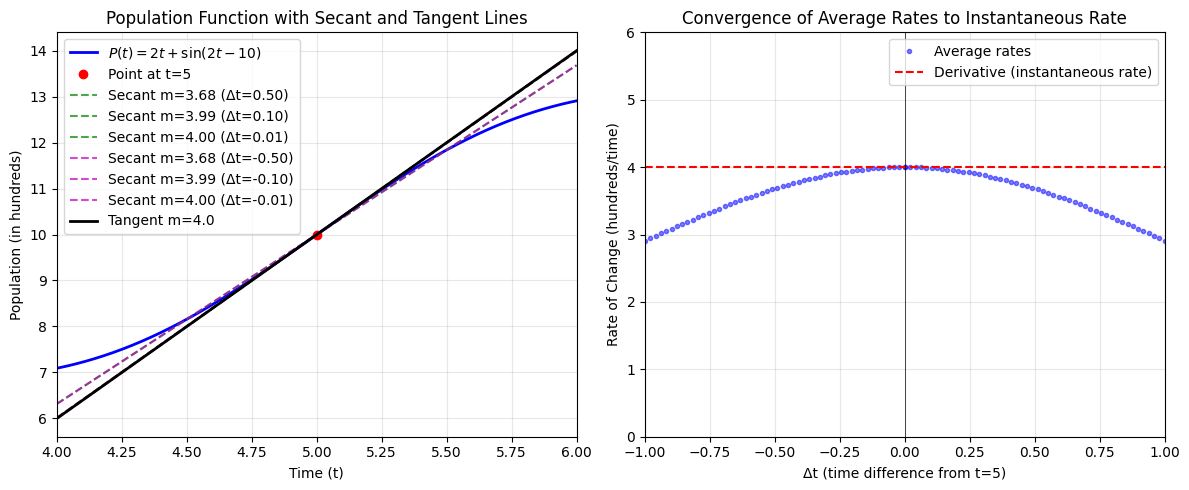

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the population function and its derivative
def P(t):
    return 2*t + np.sin(2*t - 10)

def dP(t):
    return 2 + 2*np.cos(2*t - 10)

# Create time values
t = np.linspace(4, 6, 500)
t0 = 5
P0 = P(t0)

# Create figure with two subplots
plt.figure(figsize=(12, 5))

# Plot 1: Population function with secant lines
plt.subplot(1, 2, 1)
plt.plot(t, P(t), 'b-', label=r'$P(t) = 2t + \sin(2t-10)$', linewidth=2)
plt.plot(t0, P0, 'ro', label=f'Point at t={t0}')

# Add secant lines (avoiding dt=0)
for dt in [0.5, 0.1, 0.01, -0.5, -0.1, -0.01]:
    t_sec = t0 + dt
    m = (P(t_sec) - P0)/dt
    secant = P0 + m*(t - t0)
    color = 'g' if dt > 0 else 'm'
    plt.plot(t, secant, f'{color}--', alpha=0.7, 
             label=f'Secant m={m:.2f} (Δt={dt:.2f})')

# Add tangent line
tangent = P0 + dP(t0)*(t - t0)
plt.plot(t, tangent, 'k-', label=f'Tangent m={dP(t0):.1f}', linewidth=2)

plt.title('Population Function with Secant and Tangent Lines')
plt.xlabel('Time (t)')
plt.ylabel('Population (in hundreds)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(4, 6)

# Plot 2: Rate of change visualization
plt.subplot(1, 2, 2)
dt_values_pos = np.linspace(0.001, 1, 50)
dt_values_neg = np.linspace(-1, -0.001, 50)
dt_values = np.concatenate([dt_values_neg, dt_values_pos])
rates = [(P(t0 + dt) - P0)/dt for dt in dt_values]

plt.plot(dt_values, rates, 'b.', alpha=0.5, label='Average rates')
plt.axhline(dP(t0), color='r', linestyle='--', label='Derivative (instantaneous rate)')
plt.axvline(0, color='k', linewidth=0.5)
plt.title('Convergence of Average Rates to Instantaneous Rate')
plt.xlabel('Δt (time difference from t=5)')
plt.ylabel('Rate of Change (hundreds/time)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.xlim(-1, 1)
plt.ylim(0, 6)

plt.tight_layout()
plt.show()